In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import xarray as xr

from scipy import stats
from scipy import integrate
from numpy import exp
import math
import pymannkendall as mk

import matplotlib as mpl
import matplotlib.pyplot as plt
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import rasterio
# from osgeo import gdal
#from gistool import rasterize
import pyhdf
from pyhdf.SD import SD

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.ticker as mticker

## test

In [17]:
df = pd.read_table('D:/jjas/jjas.txt')
df

,time,pre,t,qy,qd,q,et,lai,sm
0,6/1/2022,9.451039,26.210152,23133.333330,45350.000000,22216.666670,19.574416,1.973424,29.166088
1,6/2/2022,8.850821,26.414682,20116.000000,46220.000000,26104.000000,21.050043,2.384130,24.219225
2,6/3/2022,12.496244,26.912636,15600.000000,46837.500000,31237.500000,21.050043,2.384130,40.756840
3,6/4/2022,12.513613,27.094704,15236.000000,48141.666670,32905.666670,21.050043,2.384130,43.279620
4,6/5/2022,24.152456,26.352085,17366.666670,49858.333330,32491.666660,21.050043,2.384130,38.771835
...,...,...,...,...,...,...,...,...,...
117,9/26/2022,0.036441,24.055353,7174.400000,10038.800000,2864.400000,19.403677,2.605613,24.113691
118,9/27/2022,0.096604,24.802769,7213.333333,9829.583333,2616.250000,19.403677,2.605613,26.360613
119,9/28/2022,0.258336,25.093775,7066.666667,9733.200000,2666.533333,19.403677,2.605613,22.152971
120,9/29/2022,0.135044,25.527372,7068.000000,9661.250000,2593.250000,19.403677,2.605613,23.556026


In [18]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,pre,t,qy,qd,q,et,lai,sm
time,,,,,,,,
2022-06-01,9.451039,26.210152,23133.333330,45350.000000,22216.666670,19.574416,1.973424,29.166088
2022-06-02,8.850821,26.414682,20116.000000,46220.000000,26104.000000,21.050043,2.384130,24.219225
2022-06-03,12.496244,26.912636,15600.000000,46837.500000,31237.500000,21.050043,2.384130,40.756840
2022-06-04,12.513613,27.094704,15236.000000,48141.666670,32905.666670,21.050043,2.384130,43.279620
2022-06-05,24.152456,26.352085,17366.666670,49858.333330,32491.666660,21.050043,2.384130,38.771835
...,...,...,...,...,...,...,...,...
2022-09-26,0.036441,24.055353,7174.400000,10038.800000,2864.400000,19.403677,2.605613,24.113691
2022-09-27,0.096604,24.802769,7213.333333,9829.583333,2616.250000,19.403677,2.605613,26.360613
2022-09-28,0.258336,25.093775,7066.666667,9733.200000,2666.533333,19.403677,2.605613,22.152971


In [19]:
df = df.interpolate(method='linear')
df

,pre,t,qy,qd,q,et,lai,sm
time,,,,,,,,
2022-06-01,9.451039,26.210152,23133.333330,45350.000000,22216.666670,19.574416,1.973424,29.166088
2022-06-02,8.850821,26.414682,20116.000000,46220.000000,26104.000000,21.050043,2.384130,24.219225
2022-06-03,12.496244,26.912636,15600.000000,46837.500000,31237.500000,21.050043,2.384130,40.756840
2022-06-04,12.513613,27.094704,15236.000000,48141.666670,32905.666670,21.050043,2.384130,43.279620
2022-06-05,24.152456,26.352085,17366.666670,49858.333330,32491.666660,21.050043,2.384130,38.771835
...,...,...,...,...,...,...,...,...
2022-09-26,0.036441,24.055353,7174.400000,10038.800000,2864.400000,19.403677,2.605613,24.113691
2022-09-27,0.096604,24.802769,7213.333333,9829.583333,2616.250000,19.403677,2.605613,26.360613
2022-09-28,0.258336,25.093775,7066.666667,9733.200000,2666.533333,19.403677,2.605613,22.152971


In [21]:
df_roll = df.rolling(window=5).mean()
df_roll

,pre,t,qy,qd,q,et,lai,sm
time,,,,,,,,
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-05,13.492835,26.596852,18290.400000,47281.500000,28991.100000,20.754918,2.301989,35.238722
...,...,...,...,...,...,...,...,...
2022-09-26,0.134015,23.273590,7157.765898,10333.353332,3175.587434,19.403677,2.605613,22.730694
2022-09-27,0.082441,23.604915,7196.099231,10163.429999,2967.330768,19.403677,2.605613,23.671671
2022-09-28,0.118341,23.915972,7155.663333,10014.153333,2858.489999,19.403677,2.605613,23.792026


In [24]:
df_roll['et'] = df_roll['et']/8

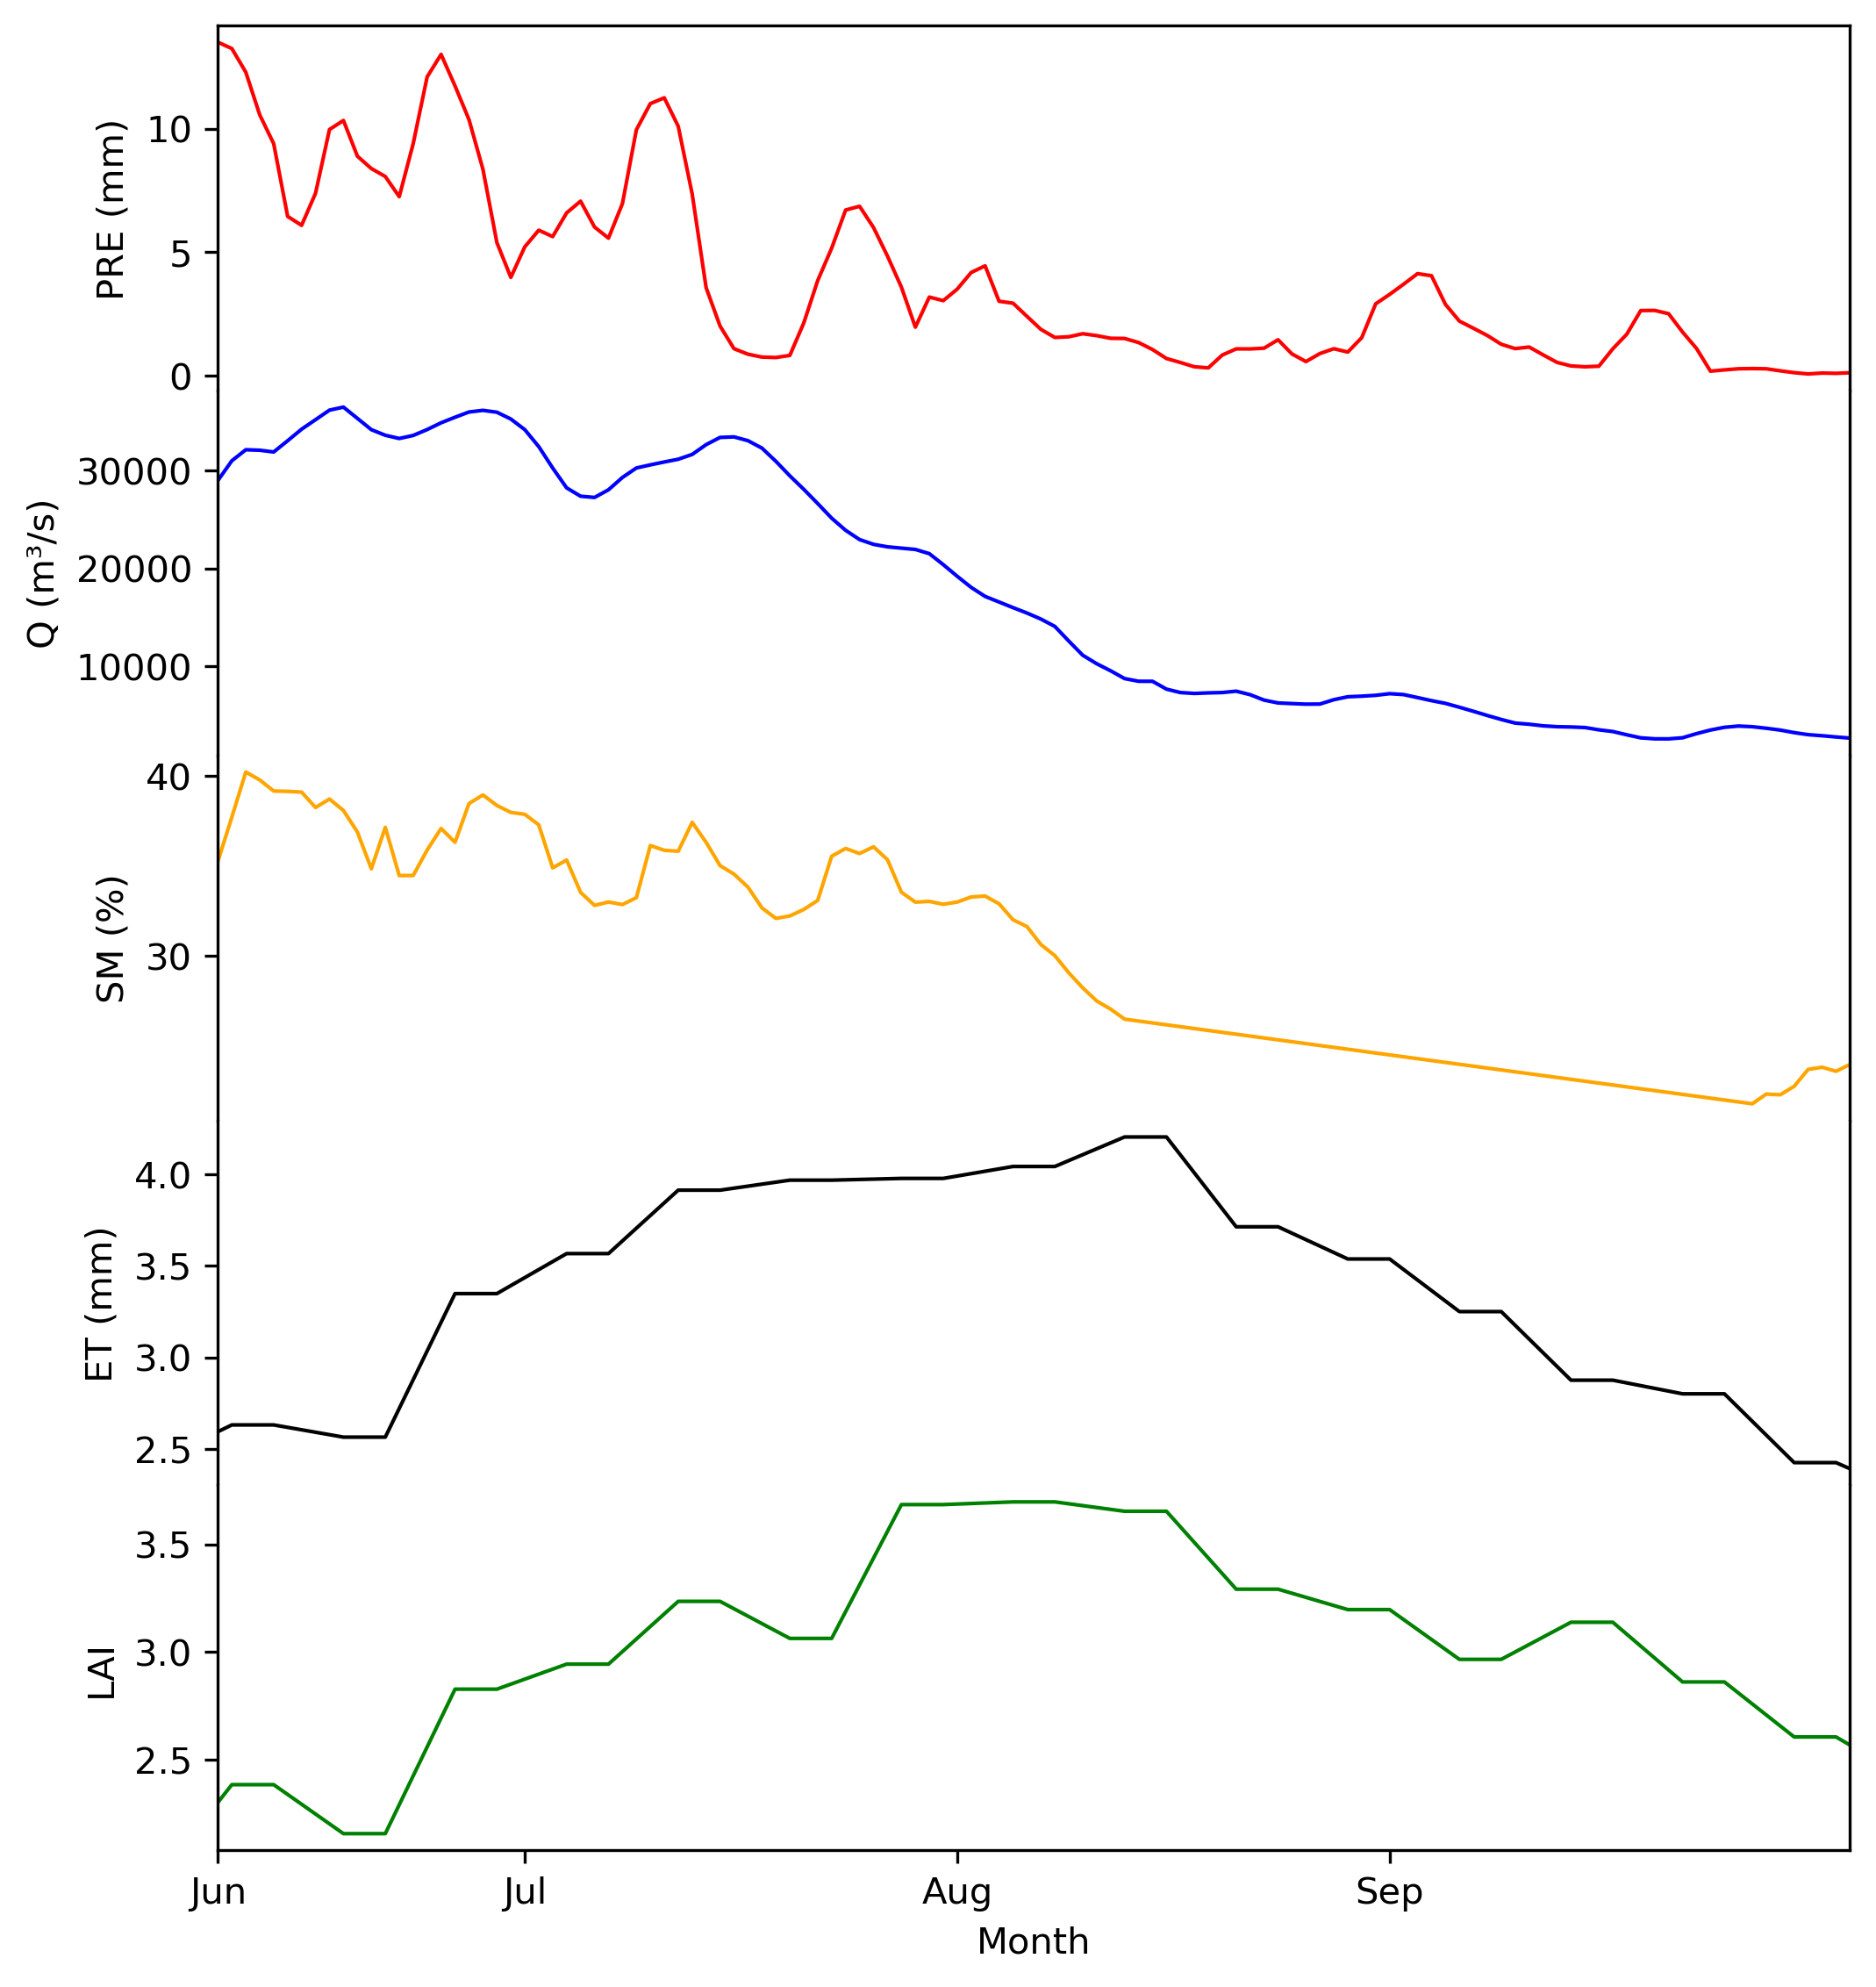

In [67]:
date = np.arange(1,123)
v1 = df_roll['pre']
v2 = df_roll['q']
v3 = df_roll['sm']
v4 = df_roll['et']
v5 = df_roll['lai']

fig, ax = plt.subplots(5,1,dpi=300,figsize=(8,9))

ax[0].plot(date, v1, color='red',lw=1, ls='-')
ax[0].set_ylabel('PRE (mm)')


ax[1].plot(date, v2, color='blue',lw=1, ls='-')
ax[1].set_ylabel('Q (m³/s)')


ax[2].plot(date, v3, color='orange',lw=1, ls='-')
ax[2].set_ylabel('SM (%)')


ax[3].plot(date, v4, color='black',lw=1, ls='-')
ax[3].set_ylabel('ET (mm)')

ax[4].plot(date, v5, color='green',lw=1, ls='-')
ax[4].set_ylabel('LAI')



ax[0].set_xlim(date[4], date[-1])
ax[1].set_xlim(date[4], date[-1])
ax[2].set_xlim(date[4], date[-1])
ax[3].set_xlim(date[4], date[-1])
ax[4].set_xlim(date[4], date[-1])



ax[0].spines['bottom'].set_visible(False)
ax[0].xaxis.set_visible(False)

ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].xaxis.set_visible(False)

ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].xaxis.set_visible(False)

ax[3].spines['bottom'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].xaxis.set_visible(False)


ax[4].spines['top'].set_visible(False)
# ax[4].xaxis.set_visible(False)
ax[4].set_xticks([5,27,58,89])
ax[4].set_xticklabels(['Jun','Jul','Aug','Sep'])
ax[4].set_xlabel('Month')


plt.subplots_adjust(hspace=0)
# fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
# ax.set_title('Daily PRE and T of 2022')
#plt.savefig('D:/rice/figs/middleyield.png')                         
plt.show()

## vegetation index

In [21]:
ds0 = xr.open_dataset('/portal1/dell/li-b/NDVI/ndvi2022_qc.nc')
# ds = ds.rename_vars({'ndvi':'vari'})

# exclude taiwan(120.5,122)(24.5,25.5)   (100,115)(85,95)
arr = ds0['vari'].values
lats = ds0.lat.values
lons = ds0.lon.values

for i in range(0,len(lats)):
    for j in range(0,len(lons)):
        if i>=2040 and j>=2400:
            arr[:,i,j] = np.nan
        else:
            continue

ds1 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

area = ds1['vari'].mean(dim=['lat','lon'],skipna=True).values
times1 = pd.date_range('2022-01-01', '2022-12-31', freq='16D')
df_8d = pd.DataFrame({'time':times1,'vari':area})
df_8d.set_index('time',inplace=True)
df_8d1 = df_8d.resample('D').asfreq().fillna(method='ffill')

date_range = pd.date_range(start=df_8d1.index.min(), end='2022-12-31')
df_extended = pd.DataFrame(index=date_range)
df_ndvi = df_8d1.combine_first(df_extended)
df_ndvi['vari'] = df_ndvi['vari'].fillna(df_8d1['vari'].loc['2022-12-19'])
df_ndvi

/tmp/ipykernel_191134/735267751.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_8d1 = df_8d.resample('D').asfreq().fillna(method='ffill')


,vari
2022-01-01,0.539149
2022-01-02,0.539149
2022-01-03,0.539149
2022-01-04,0.539149
2022-01-05,0.539149
...,...
2022-12-27,0.508592
2022-12-28,0.508592
2022-12-29,0.508592
2022-12-30,0.508592


In [22]:
ds0 = xr.open_dataset('/portal1/dell/li-b/NDVI/evi2022_qc.nc')
# ds = ds.rename_vars({'ndvi':'vari'})

# exclude taiwan(120.5,122)(24.5,25.5)   (100,115)(85,95)
arr = ds0['vari'].values
lats = ds0.lat.values
lons = ds0.lon.values

for i in range(0,len(lats)):
    for j in range(0,len(lons)):
        if i>=2040 and j>=2400:
            arr[:,i,j] = np.nan
        else:
            continue

ds1 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

area = ds1['vari'].mean(dim=['lat','lon'],skipna=True).values
times1 = pd.date_range('2022-01-01', '2022-12-31', freq='16D')
df_8d = pd.DataFrame({'time':times1,'vari':area})
df_8d.set_index('time',inplace=True)
df_8d1 = df_8d.resample('D').asfreq().fillna(method='ffill')

date_range = pd.date_range(start=df_8d1.index.min(), end='2022-12-31')
df_extended = pd.DataFrame(index=date_range)
df_evi = df_8d1.combine_first(df_extended)
df_evi['vari'] = df_evi['vari'].fillna(df_8d1['vari'].loc['2022-12-19'])
df_evi

/tmp/ipykernel_191134/848348289.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_8d1 = df_8d.resample('D').asfreq().fillna(method='ffill')


,vari
2022-01-01,0.272573
2022-01-02,0.272573
2022-01-03,0.272573
2022-01-04,0.272573
2022-01-05,0.272573
...,...
2022-12-27,0.253980
2022-12-28,0.253980
2022-12-29,0.253980
2022-12-30,0.253980


In [12]:
ds0 = xr.open_dataset('/portal1/dell/li-b/NDVI/lai2022_qc.nc')
# ds = ds.rename_vars({'ndvi':'vari'})

# exclude taiwan(120.5,122)(24.5,25.5)   (100,115)(85,95)
arr = ds0['vari'].values
lats = ds0.lat.values
lons = ds0.lon.values

for i in range(0,len(lats)):
    for j in range(0,len(lons)):
        if i>=2040 and j>=2400:
            arr[:,i,j] = np.nan
        else:
            continue

ds1 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

from datetime import datetime
times = ds1.time.values
times1 = []
for t in times:
    t1 = datetime.strptime(str(t),'%Y-%m-%d %H:%M:%S')
    t2 = pd.to_datetime(t1)
    times1.append(t2)
times1 = np.array(times1)

area = ds1['vari'].mean(dim=['lat','lon'],skipna=True).values
df_8d = pd.DataFrame({'time':times1,'vari':area})
df_8d.set_index('time',inplace=True)
df_8d1 = df_8d.resample('D').fillna(method='ffill')

date_range = pd.date_range(start=df_8d1.index.min(), end='2022-12-31')
df_extended = pd.DataFrame(index=date_range)
df_lai = df_8d1.combine_first(df_extended)
df_lai['vari'] = df_lai['vari'].fillna(df_8d1['vari'].loc['2022-12-27'])
df_lai

/tmp/ipykernel_442178/2848187962.py:33: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  df_8d1 = df_8d.resample('D').fillna(method='ffill')


,vari
2022-01-01,1.223813
2022-01-02,1.223813
2022-01-03,1.223813
2022-01-04,1.223813
2022-01-05,1.223813
...,...
2022-12-27,1.145973
2022-12-28,1.145973
2022-12-29,1.145973
2022-12-30,1.145973


In [36]:
ds0 = xr.open_dataset('/portal1/dell/li-b/CSIF/CMG4dayCombinedResults_2022.nc')
# ds = ds.rename_vars({'ndvi':'vari'})

# exclude taiwan(120.5,122)(24.5,25.5)   (100,115)(85,95)
arr = ds0['vari'].values
lats = ds0.lat.values
lons = ds0.lon.values

for i in range(0,len(lats)):
    for j in range(0,len(lons)):
        if i<=20 and j>=191:
            arr[:,i,j] = np.nan
        else:
            continue

ds1 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

area = ds1['vari'].mean(dim=['lat','lon'],skipna=True).values
times1 = pd.date_range('2022-01-01', '2022-12-31', freq='4D')
df_8d = pd.DataFrame({'time':times1,'vari':area})
df_8d.set_index('time',inplace=True)
df_8d1 = df_8d.resample('D').asfreq().fillna(method='ffill')

date_range = pd.date_range(start=df_8d1.index.min(), end='2022-12-31')
df_extended = pd.DataFrame(index=date_range)
df_sif = df_8d1.combine_first(df_extended)
df_sif['vari'] = df_sif['vari'].fillna(df_8d1['vari'].loc[df_8d1.index.max()])
df_sif

/tmp/ipykernel_191134/2273038643.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_8d1 = df_8d.resample('D').asfreq().fillna(method='ffill')


,vari
time,
2022-01-01,0.085553
2022-01-02,0.085553
2022-01-03,0.085553
2022-01-04,0.085553
2022-01-05,0.085174
...,...
2022-12-27,0.086175
2022-12-28,0.086175
2022-12-29,0.086175


In [13]:
ds0 = xr.open_dataset('/portal1/dell/li-b/CGLS/lai2022.nc')
# ds = ds.rename_vars({'ndvi':'vari'})

# exclude taiwan(120.5,122)(24.5,25.5)   (100,115)(85,95)
arr = ds0['vari'].values
lats = ds0.lat.values
lons = ds0.lon.values

for i in range(0,len(lats)):
    for j in range(0,len(lons)):
        if i>=2860 and j>=3200:
            arr[:,i,j] = np.nan
        else:
            continue

ds1 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

area = ds1['vari'].mean(dim=['lat','lon'],skipna=True).values
times1 = ds1.time.values
df_8d = pd.DataFrame({'time':times1,'vari':area})
df_8d.set_index('time', inplace=True)

df_sorted = df_8d.sort_index()
df_abnormal = df_sorted.groupby(df_sorted.index).mean()

df_8d1 = df_abnormal.resample('D').fillna(method='bfill')
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
df_extended = pd.DataFrame(index=date_range)
df_lai2 = df_8d1.combine_first(df_extended)
df_lai2['vari'] = df_lai2['vari'].fillna(df_8d1['vari'].loc[df_8d1.index.min()])
df_lai2

/tmp/ipykernel_442178/2250848147.py:29: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  df_8d1 = df_abnormal.resample('D').fillna(method='bfill')


,vari
2022-01-01,1.603376
2022-01-02,1.603376
2022-01-03,1.603376
2022-01-04,1.603376
2022-01-05,1.603376
...,...
2022-12-27,1.478457
2022-12-28,1.478457
2022-12-29,1.478457
2022-12-30,1.478457


In [24]:
ds0 = xr.open_dataset('/portal1/dell/li-b/yankaiLAI/qc.nc')

# exclude taiwan(120.5,122)(24.5,25.5)   (100,115)(85,95)
arr = ds0['vari'].values
lats = ds0.lat.values
lons = ds0.lon.values

for i in range(0,len(lats)):
    for j in range(0,len(lons)):
        if i>=188 and j>=211:
            arr[:,i,j] = np.nan
        else:
            continue

ds00 = xr.Dataset({'vari': (['time','lat','lon'], arr)},
                      coords={'time': (['time'], ds0.time.values), 
                              'lat': (['lat'], ds0.lat.values),
                      'lon': (['lon'], ds0.lon.values),})

ds1 = ds00['vari'].where(ds00['vari']<=100, np.nan).to_dataset(name='vari')

area = ds1['vari'].mean(dim=['lat','lon'],skipna=True).values*0.1
times1 = ds1.time.values
df_8d = pd.DataFrame({'time':times1,'vari':area})
df_8d.set_index('time', inplace=True)
df_8d1 = df_8d.resample('D').fillna(method='ffill')

df2022 = df_8d1.loc[df_8d1.index.year==2022]
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
df_extended = pd.DataFrame(index=date_range)
df_lai3 = df2022.combine_first(df_extended)
df_lai3['vari'] = df_lai3['vari'].fillna(df2022['vari'].loc['2022-12-27'])
df_lai3

/tmp/ipykernel_442178/1508666138.py:26: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  df_8d1 = df_8d.resample('D').fillna(method='ffill')


,vari
2022-01-01,0.810338
2022-01-02,0.810338
2022-01-03,0.810338
2022-01-04,0.810338
2022-01-05,0.810338
...,...
2022-12-27,1.840273
2022-12-28,1.840273
2022-12-29,1.840273
2022-12-30,1.840273


## plot

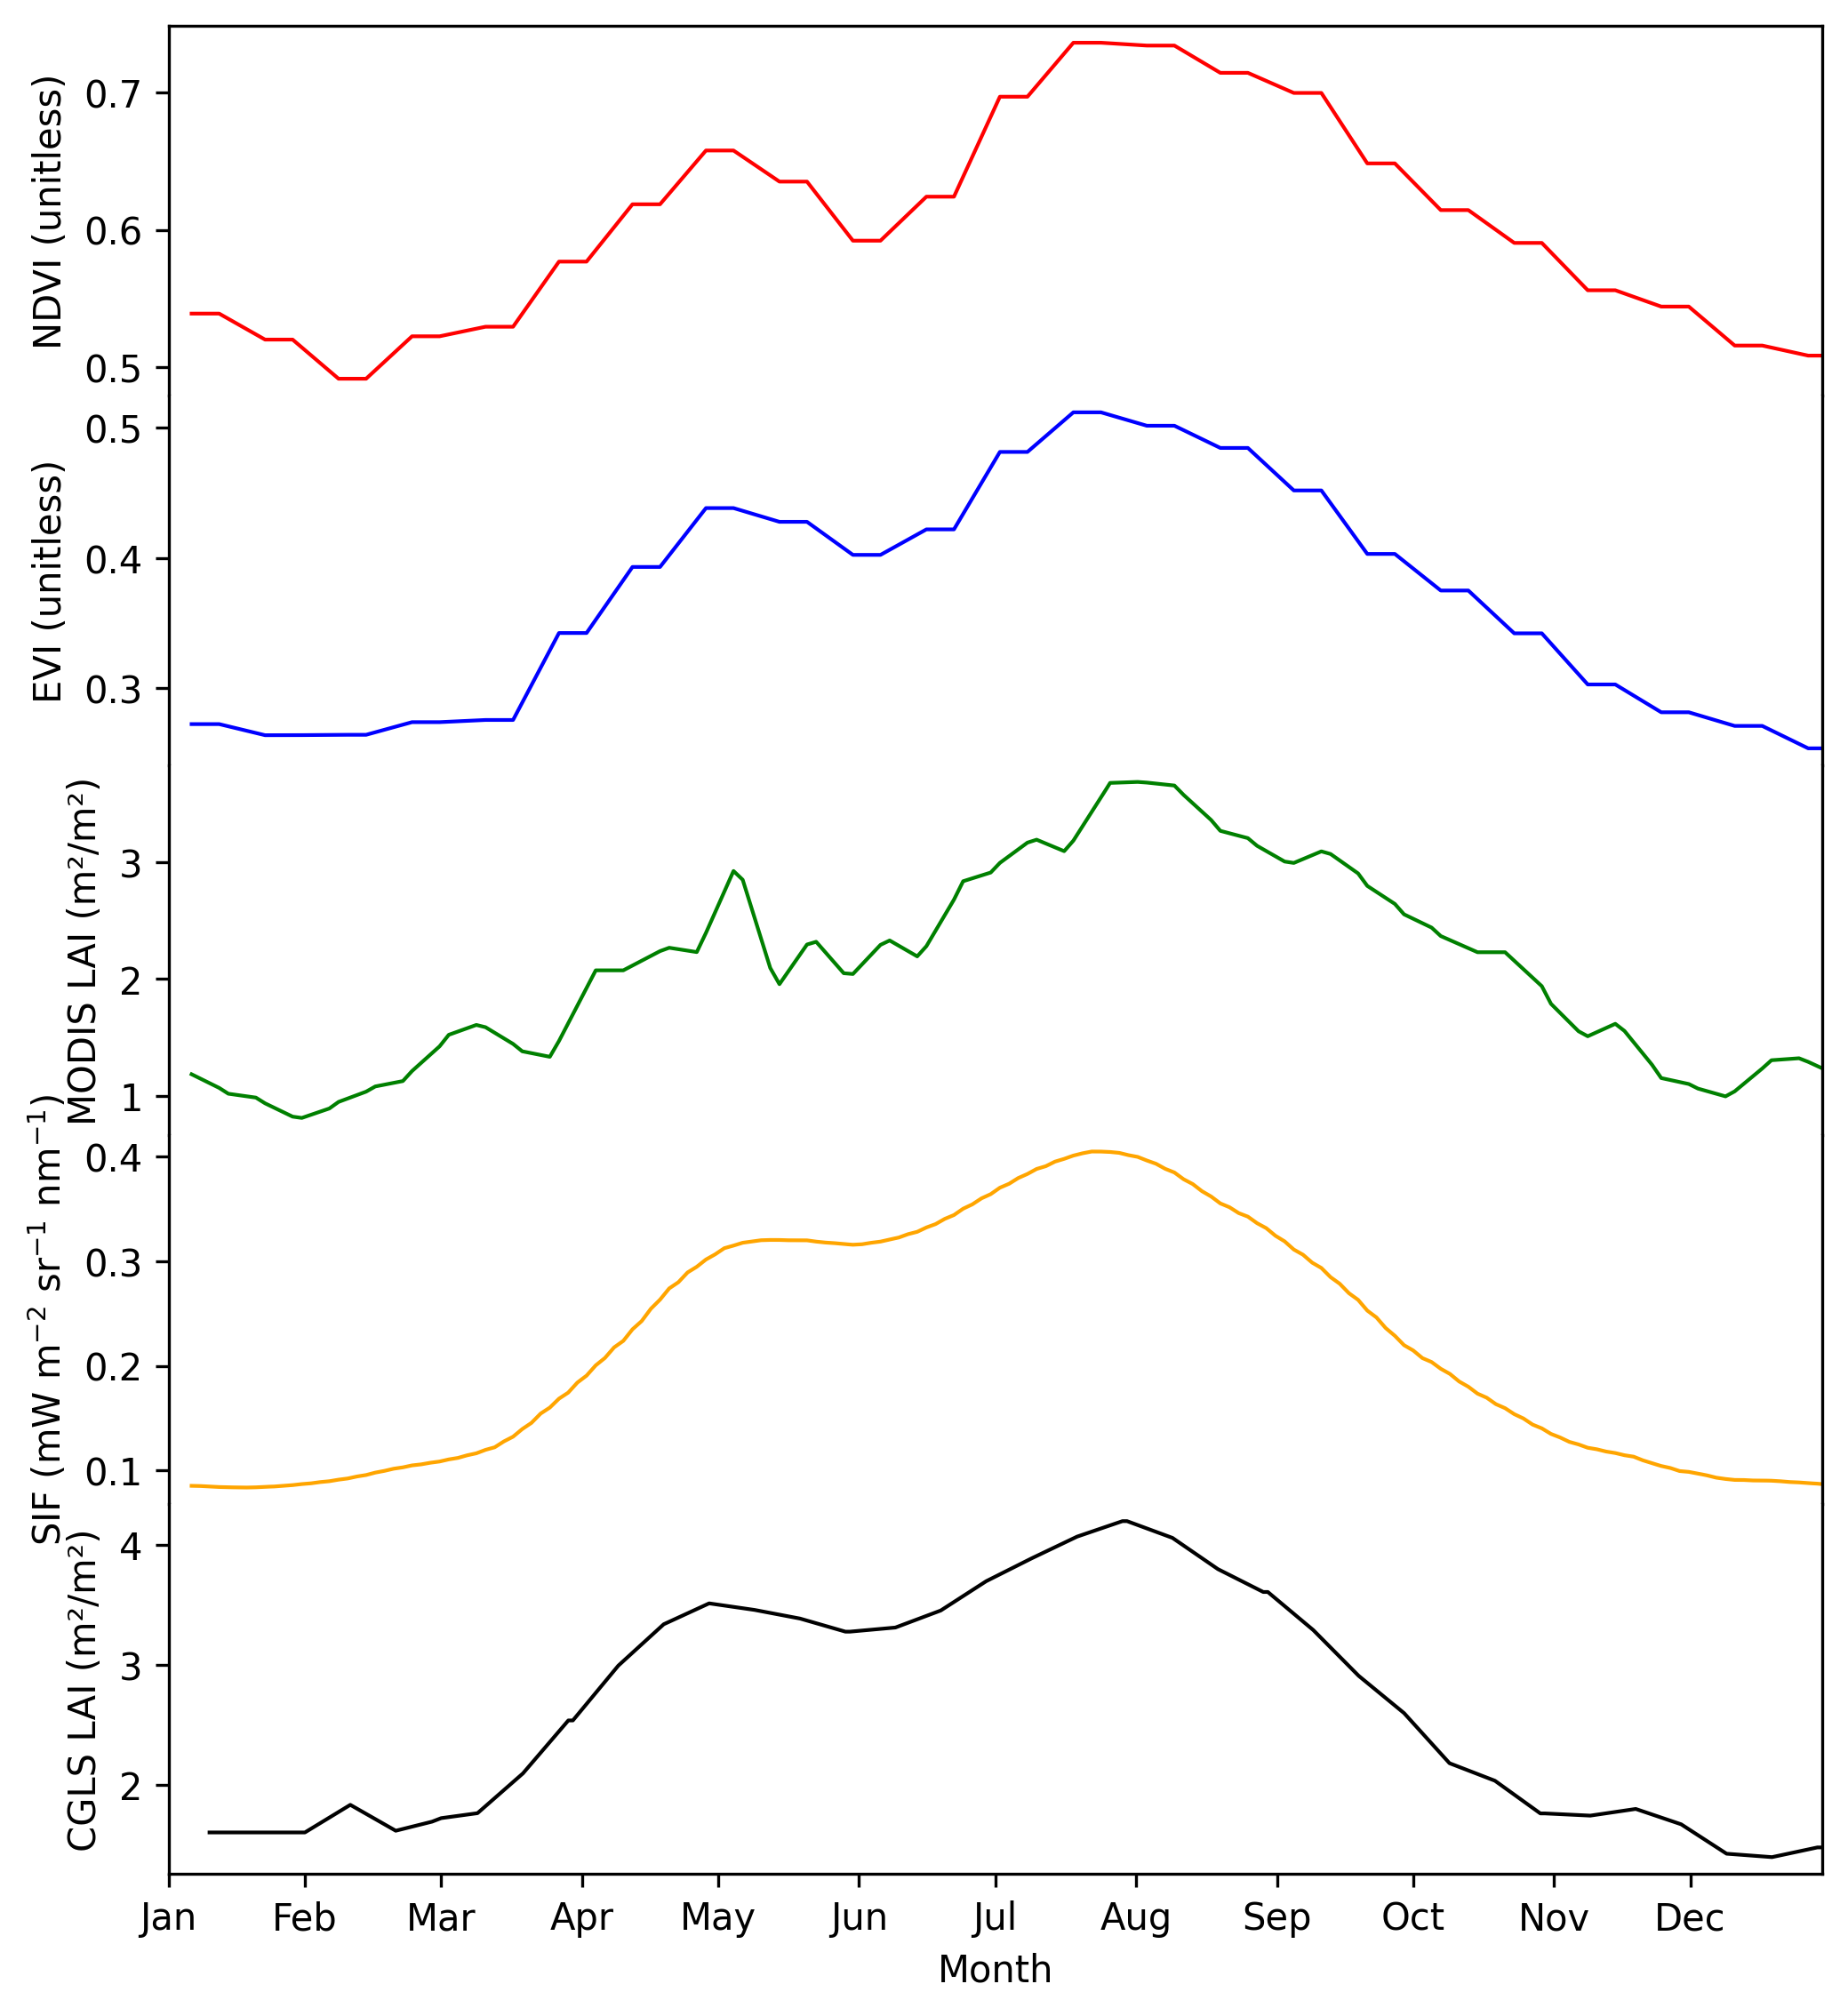

In [44]:
date = np.arange(1,366)
v1 = df_ndvi['vari']
v2 = df_evi['vari']
v3 = df_lai['vari']
v4 = df_sif['vari']
v5 = df_lai2['vari']

window_size = 10
v1_0 = v1.rolling(window=window_size).mean()
v2_0 = v2.rolling(window=window_size).mean()
v3_0 = v3.rolling(window=window_size).mean()
v4_0 = v4.rolling(window=window_size).mean()
v5_0 = v5.rolling(window=window_size).mean()

fig, ax = plt.subplots(5,1,dpi=300,figsize=(8,9))

ax[0].plot(date, v1_0, color='red',lw=1, ls='-')
ax[0].set_ylabel('NDVI (unitless)')


ax[1].plot(date, v2_0, color='blue',lw=1, ls='-')
ax[1].set_ylabel('EVI (unitless)')


ax[2].plot(date, v3_0, color='green',lw=1, ls='-')
ax[2].set_ylabel('MODIS LAI (m²/m²)')


ax[3].plot(date, v4_0, color='orange',lw=1, ls='-')
ax[3].set_ylabel('SIF (mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$)')

ax[4].plot(date, v5_0, color='black',lw=1, ls='-')
ax[4].set_ylabel('CGLS LAI (m²/m²)')



ax[0].set_xlim(date[4], date[-1])
ax[1].set_xlim(date[4], date[-1])
ax[2].set_xlim(date[4], date[-1])
ax[3].set_xlim(date[4], date[-1])
ax[4].set_xlim(date[4], date[-1])



ax[0].spines['bottom'].set_visible(False)
ax[0].xaxis.set_visible(False)

ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].xaxis.set_visible(False)

ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].xaxis.set_visible(False)

ax[3].spines['bottom'].set_visible(False)
ax[3].spines['top'].set_visible(False)
ax[3].xaxis.set_visible(False)


ax[4].spines['top'].set_visible(False)
# ax[4].xaxis.set_visible(False)
ax[4].set_xticks([1,31,61,92,122,153,183,214,245,275,306,336])
ax[4].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax[4].set_xlabel('Month')


plt.subplots_adjust(hspace=0)
# fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
# ax.set_title('Daily PRE and T of 2022')
#plt.savefig('D:/rice/figs/middleyield.png')                         
plt.show()

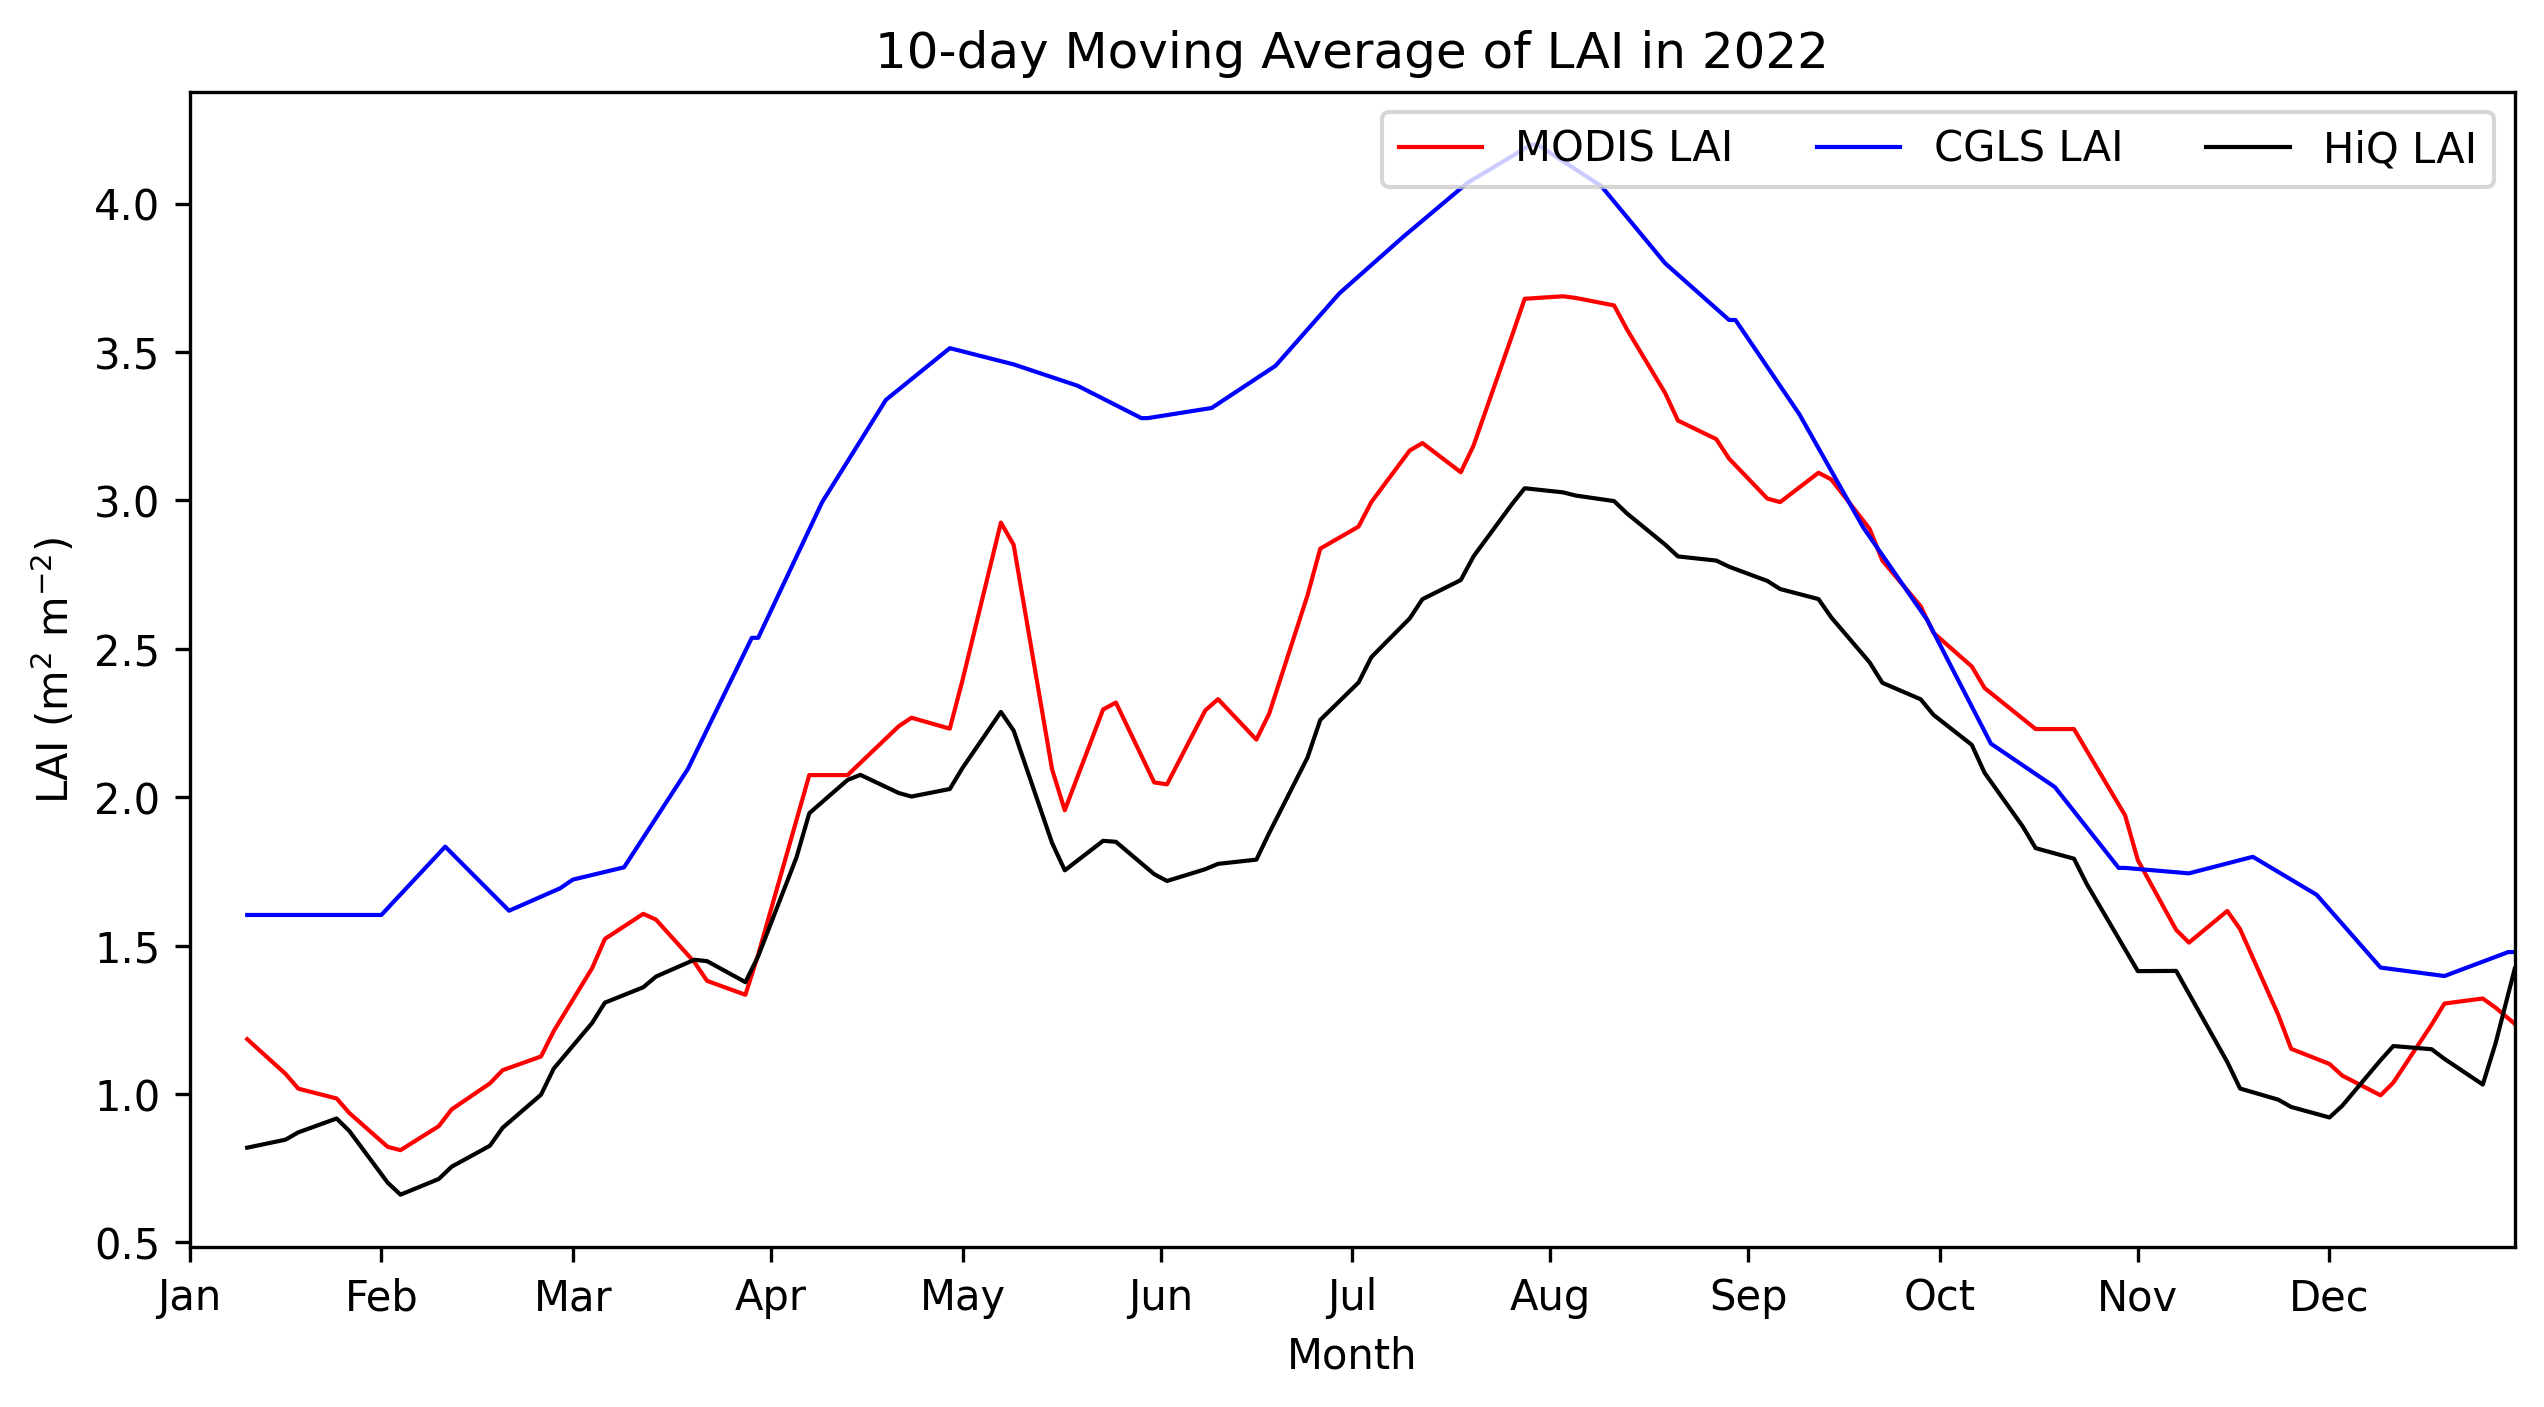

In [32]:
date = np.arange(1,366)
v1 = df_lai['vari']
v2 = df_lai2['vari']
v3 = df_lai3['vari']

window_size = 10
v1_0 = v1.rolling(window=window_size).mean()
v2_0 = v2.rolling(window=window_size).mean()
v3_0 = v3.rolling(window=window_size).mean()


fig, ax = plt.subplots(1,1,dpi=300,figsize=(10,5))

ax.plot(date, v1_0,color='red',lw=1, ls='-', label='MODIS LAI')
ax.plot(date, v2_0,color='blue',lw=1, ls='-', label='CGLS LAI')
ax.plot(date, v3_0,color='black',lw=1, ls='-', label='HiQ LAI')

ax.set_ylabel('LAI (m$^2$ m$^{-2}$)')


ax.set_xticks([1,31,61,92,122,153,183,214,245,275,306,336])
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')

ax.set_title('10-day Moving Average of LAI in 2022')
ax.set_xlim(date[0], date[-1])
fig.legend(loc="lower right", bbox_to_anchor=(1, 0.9), bbox_transform=ax.transAxes, ncol = 5)

#plt.savefig('D:/rice/figs/middleyield.png')                         
plt.show()